### Careers in Data
I endeavored to shed some light on the following questions:
* Who gets hired? What kind of talent do employers want when they are hiring a data scientist?
* Which programming languages are most used in data science?
* What are trends in salary and market growth?

-----


In [36]:
import pandas as pd
import numpy as np
import folium
import os
import json
import geojson
import nltk
nltk.download('stopwords')
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline

from subprocess import check_output
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\meaga\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [37]:
k_set = pd.read_csv('alldata.csv')

stopwords = nltk.corpus.stopwords.words('english')
RE_stopwords = r'\b(?:{})\b'.format('|'.join(stopwords))

k_set['description'] = k_set['description'].replace([r'\|', '/','•',RE_stopwords,'  ','\n'], [' ',' ','', ' ',' ',' '], regex=True)
k_set.head(5)

,position,company,description,reviews,location
0,Development Director,ALS TDI,Development Director ALS Therapy Development I...,NaN,"Atlanta, GA 30301"
1,An Ostentatiously-Excitable Principal Research...,The Hexagon Lavish,"Job Description ""The road leads accomplishm...",NaN,"Atlanta, GA"
2,Data Scientist,Xpert Staffing,"Growing company located Atlanta, GA area cu...",NaN,"Atlanta, GA"
3,Data Analyst,Operation HOPE,DEPARTMENT: Program OperationsPOSITION LOCATIO...,44.0,"Atlanta, GA 30303"
4,Assistant Professor -TT - Signal Processing & ...,Emory University,DESCRIPTION The Emory University Department B...,550.0,"Atlanta, GA"


In [38]:
words = k_set['description'].str.cat(sep=' ')
words = words.split()

top_words = pd.DataFrame(Counter(words).most_common(),
                    columns=['Word', 'Frequency']).set_index('Word')

top_words.head()

,Frequency
Word,
data,30202
experience,16997
work,14588
team,12502
The,11345


In [41]:
p_langs = ['JavaScript', 'HTML', 'CSS', 'SQL', 'Java', 
           'Bash/Shell', 'Python', 'C#', 'PHP', 'C++', 'C', 
           'TypeScript', 'Ruby', 'Swift', 'Assembly', 'Go', 
           'Objective-C', 'VB.NET', 'R', 'Matlab', 'VBA', 
           'Kotlin', 'Scala', 'Groovy', 'Perl']

In [42]:
top_langs_df = top_words.loc[p_langs]
top_langs_df.sort_values(by=['Frequency'], ascending=False)

C:\Users\meaga\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  """Entry point for launching an IPython kernel.


,Frequency
Word,
Python,1422.0
SQL,1228.0
R,823.0
Java,458.0
C,407.0
C++,361.0
Scala,188.0
JavaScript,152.0
Perl,113.0


In [43]:
so_set = pd.read_csv('survey_results_public.csv', dtype=str)

so_set_df = pd.DataFrame({'Developer Type': so_set['DevType'],
                         'Programming Languages Used': so_set['LanguageWorkedWith'],
                         'Databases Used': so_set['DatabaseWorkedWith']})
so_set_df.head()

,Developer Type,Programming Languages Used,Databases Used
0,Full-stack developer,JavaScript;Python;HTML;CSS,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...
1,Database administrator;DevOps specialist;Full-...,JavaScript;Python;Bash/Shell,Redis;PostgreSQL;Memcached
2,Engineering manager;Full-stack developer,NaN,NaN
3,Full-stack developer,C#;JavaScript;SQL;TypeScript;HTML;CSS;Bash/Shell,"SQL Server;Microsoft Azure (Tables, CosmosDB, ..."
4,Data or business analyst;Desktop or enterprise...,C;C++;Java;Matlab;R;SQL;Bash/Shell,SQL Server;PostgreSQL;Oracle;IBM Db2


In [44]:
so_set_df2 = so_set_df.dropna()

so_set_df2 = so_set_df2.replace([r';', ','], [' ', ' '], regex=True)
so_set_df2.head()

,Developer Type,Programming Languages Used,Databases Used
0,Full-stack developer,JavaScript Python HTML CSS,Redis SQL Server MySQL PostgreSQL Amazon RDS/A...
1,Database administrator DevOps specialist Full-...,JavaScript Python Bash/Shell,Redis PostgreSQL Memcached
3,Full-stack developer,C# JavaScript SQL TypeScript HTML CSS Bash/Shell,SQL Server Microsoft Azure (Tables CosmosDB ...
4,Data or business analyst Desktop or enterprise...,C C++ Java Matlab R SQL Bash/Shell,SQL Server PostgreSQL Oracle IBM Db2
5,Back-end developer Database administrator Fron...,Java JavaScript Python TypeScript HTML CSS,MongoDB


In [45]:
so_set_df3 = so_set_df2[so_set_df2['Developer Type'].str.contains('Data or business analyst', 'Data scientist', regex=False)]
so_set_df3.head()

,Developer Type,Programming Languages Used,Databases Used
4,Data or business analyst Desktop or enterprise...,C C++ Java Matlab R SQL Bash/Shell,SQL Server PostgreSQL Oracle IBM Db2
8,Back-end developer C-suite executive (CEO CTO...,Assembly CoffeeScript Erlang Go JavaScript Lua...,Redis PostgreSQL Amazon DynamoDB Apache HBase ...
87,Back-end developer Data or business analyst Da...,Java JavaScript SQL VBA HTML CSS Bash/Shell,PostgreSQL SQLite Oracle
112,Data or business analyst,C C++ Java HTML CSS,MySQL SQLite
131,Back-end developer Data or business analyst Da...,PHP Python R SQL HTML CSS,SQL Server MySQL PostgreSQL SQLite


In [46]:
words = so_set_df3['Programming Languages Used'].str.cat(sep=' ')
words = words.split()

so_ptop_words = pd.DataFrame(Counter(words).most_common(),
                    columns=['Word', 'Frequency']).set_index('Word')

so_ptop_words.head()

,Frequency
Word,
SQL,4746
HTML,4178
JavaScript,4037
CSS,3931
Python,2831


In [50]:
so_top_langs_df = so_ptop_words.loc[p_langs]
so_top_langs_df.sort_values(by=['Frequency'], ascending=False, inplace=True)
so_top_langs_df.head()

,Frequency
Word,
SQL,4746
HTML,4178
JavaScript,4037
CSS,3931
Python,2831


In [62]:
top_langs_comb = pd.concat([top_langs_df, so_top_langs_df])
top_langs_comb2 = top_langs_comb.groupby(['Word']).agg({'Frequency': 'sum'}).reset_index()
top_langs_comb2.sort_values(by=['Frequency'], ascending=False, inplace=True)
top_langs_comb2.head()

,Word,Frequency
19,SQL,5974.0
16,Python,4253.0
8,HTML,4224.0
10,JavaScript,4189.0
5,CSS,3992.0


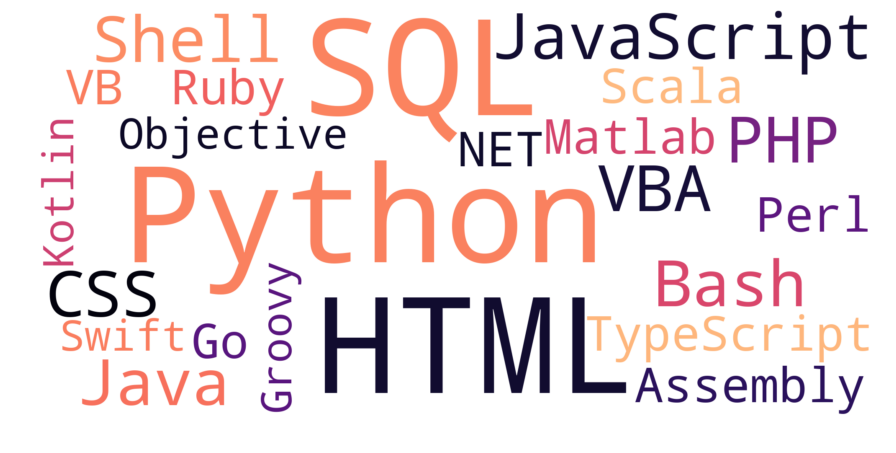

In [59]:
wordcloud = WordCloud(background_color='white',
                      width=2000,
                      height=1000,
                      max_words=23, 
                      max_font_size=320,
                      colormap='magma',
                      random_state=42).generate(str(top_langs_comb2['Word']))

fig = plt.gcf()
fig.set_size_inches(15,10)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [60]:
words = so_set_df3['Databases Used'].str.cat(sep=' ')
words = words.split()

so_dtop_words = pd.DataFrame(Counter(words).most_common(),
                    columns=['Word', 'Frequency']).set_index('Word')

so_dtop_words2 = so_dtop_words.reset_index()
so_dtop_words2.head()

,Word,Frequency
0,SQL,4040
1,Server,3379
2,MySQL,3377
3,PostgreSQL,1998
4,MongoDB,1386


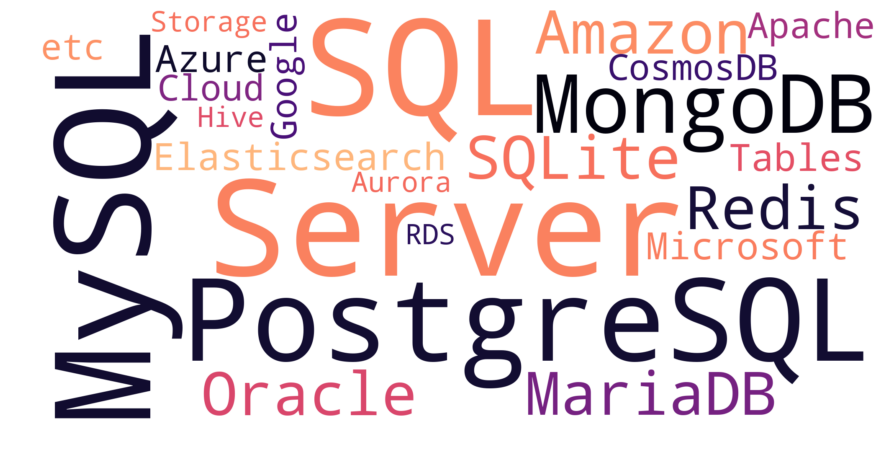

In [61]:
wordcloud = WordCloud(background_color='white',
                      width=2000,
                      height=1000,
                      max_words=23, 
                      max_font_size=320,
                      colormap='magma',
                      random_state=42).generate(str(so_dtop_words2['Word']))

fig = plt.gcf()
fig.set_size_inches(15,10)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [63]:
df = pd.read_csv('state_2017.csv')
df.head()

,AREA,ST,STATE,OCC_CODE,OCC_TITLE,OCC_GROUP,TOT_EMP,EMP_PRSE,JOBS_1000,LOC_Q,...,H_MEDIAN,H_PCT75,H_PCT90,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90,ANNUAL,HOURLY
0,1,AL,Alabama,00-0000,All Occupations,total,"1,922,570",0.4,1000.000,1.00,...,15.77,25.01,37.83,"17,770","21,740","32,800","52,020","78,690",NaN,NaN
1,1,AL,Alabama,11-0000,Management Occupations,major,"69,950",1.0,36.385,0.71,...,46.63,64.12,90.80,"52,130","70,130","96,980","133,360","188,860",NaN,NaN
2,1,AL,Alabama,11-1011,Chief Executives,detailed,"1,120",6.0,0.585,0.40,...,94.45,#,#,"84,520","125,290","196,460",#,#,NaN,NaN
3,1,AL,Alabama,11-1021,General and Operations Managers,detailed,"27,150",1.6,14.123,0.91,...,49.19,71.09,#,"54,040","72,610","102,320","147,860",#,NaN,NaN
4,1,AL,Alabama,11-1031,Legislators,detailed,"1,100",12.0,0.572,1.59,...,*,*,*,"16,310","17,280","18,910","24,630","47,510",True,NaN


In [64]:
oes_df = pd.DataFrame({'State': df['ST'],
                       'Occupation': df['OCC_TITLE'],
                       'Total Employed': df['TOT_EMP'],
                       'Mean Annual Wage': df['A_MEAN']
                      }).set_index('Occupation')
oes_df.head()

,State,Total Employed,Mean Annual Wage
Occupation,,,
All Occupations,AL,"1,922,570","43,170"
Management Occupations,AL,"69,950","111,150"
Chief Executives,AL,"1,120","207,090"
General and Operations Managers,AL,"27,150","120,730"
Legislators,AL,"1,100","25,410"


In [65]:
oes_stats_df = oes_df.loc['Statisticians']
oes_stats_df.head()

,State,Total Employed,Mean Annual Wage
Occupation,,,
Statisticians,AL,180,"64,200"
Statisticians,AK,30,"88,750"
Statisticians,AZ,980,"75,800"
Statisticians,AR,370,"76,050"
Statisticians,CA,"4,990","94,230"


In [66]:
oes_area_df = oes_stats_df.set_index('State')
oes_area_df['Mean Annual Wage'] = oes_area_df['Mean Annual Wage'].str.replace(',', '').astype(float)


oes_area_df2 = pd.DataFrame({'Mean Annual Wage': oes_area_df['Mean Annual Wage'],
                            })
oes_area_df2.head()
#oes_area_df2.to_csv('2017_Statisticians_by_State.csv')

,Mean Annual Wage
State,
AL,64200.0
AK,88750.0
AZ,75800.0
AR,76050.0
CA,94230.0


In [68]:
state_geo = os.path.join('us-states.json')
state_data = pd.read_csv('2017_Statisticians_by_State.csv')
m = folium.Map(location=[40, -98], zoom_start=4)

m.choropleth(
 geo_data=state_geo,
 name='choropleth',
 data=state_data,
 columns=['State', 'Mean Annual Wage'],
 key_on='feature.id',
 fill_color='BuPu',
 fill_opacity=0.8,
 line_opacity=0.2,
 legend_name='Mean Annual Wage')

folium.LayerControl().add_to(m)

m.save('folium_chloropleth_USA1.html')
m